#### set up the envirement:

In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
print('set up completed')

set up completed


In [3]:
cars_data = pd.read_csv('./autos.csv')

In [4]:
cars_data.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


#### hot encoded the data:

In [5]:
A,B = cars_data['engine_location'].factorize()

In [8]:
X = cars_data.copy()
y = X.pop('price')

for colname in X.select_dtypes('object'):
    X[colname],_ = X[colname].factorize()

discrete_features = X.dtypes == int

In [9]:
X.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
1,3,0,0,0,2,0,0,0,88.6,168.8,...,4,130,0,3.47,2.68,9,111,5000,21,27
2,1,0,0,0,2,1,0,0,94.5,171.2,...,6,152,0,2.68,3.47,9,154,5000,19,26
3,2,1,0,0,4,2,1,0,99.8,176.6,...,4,109,0,3.19,3.40,10,102,5500,24,30
4,2,1,0,0,4,2,2,0,99.4,176.6,...,5,136,0,3.19,3.40,8,115,5500,18,22


In [13]:
def make_MI_scores(X,y,discrete_features) :
    mi_scores = mutual_info_regression(X,y,discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores,index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)

    return mi_scores


In [14]:
mi_scores = make_MI_scores(X,y,discrete_features)

In [24]:
mi_df = pd.DataFrame({'score':mi_scores,'col':mi_scores.index})

In [25]:
mi_df

,score,col
curb_weight,1.483236,curb_weight
horsepower,1.267253,horsepower
engine_size,1.002801,engine_size
highway_mpg,0.954145,highway_mpg
city_mpg,0.853981,city_mpg
width,0.693821,width
length,0.618025,length
wheel_base,0.578400,wheel_base
make,0.543287,make
bore,0.489580,bore


<AxesSubplot:title={'center':'The bar plot of MI for every features '}, xlabel='score', ylabel='col'>

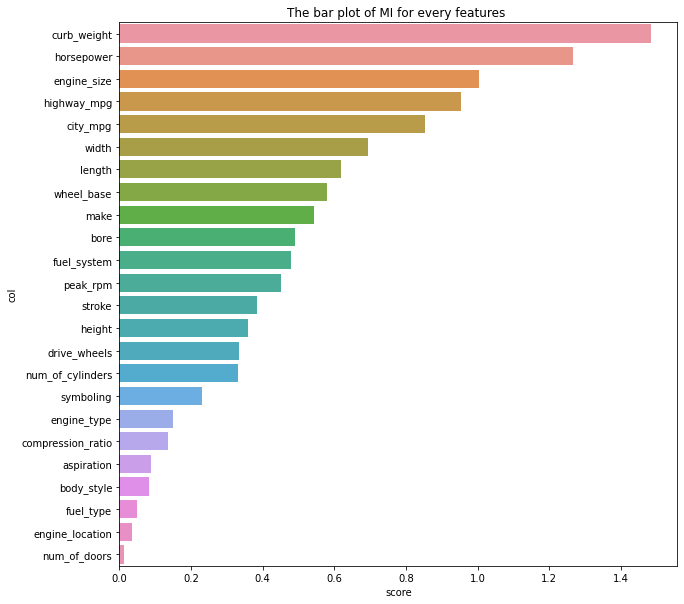

In [27]:
plt.figure(figsize=(10,10))
plt.title('The bar plot of MI for every features ')

sns.barplot(x='score',y='col',data=mi_df)

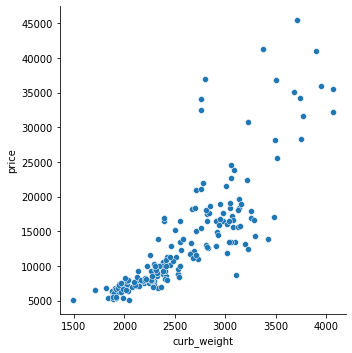

In [28]:
sns.relplot(x='curb_weight',y='price',data=cars_data)

## create new features:

In [5]:
cars_data = pd.read_csv('./autos.csv')

In [7]:
cars_data['stroke_ratio'] = cars_data.stroke / cars_data.bore

In [8]:
cars_data.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,stroke_ratio
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9,111,5000,21,27,13495,0.772334
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9,111,5000,21,27,16500,0.772334
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9,154,5000,19,26,16500,1.294776
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10,102,5500,24,30,13950,1.065831
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8,115,5500,18,22,17450,1.065831


In [9]:
cars_data['diplacement'] =(
    np.pi*((cars_data.bore**0.5)**2)*cars_data.stroke*cars_data.num_of_cylinders
)

In [10]:
cars_data.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,stroke_ratio,diplacement
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9,111,5000,21,27,13495,0.772334,116.862220
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9,111,5000,21,27,16500,0.772334,116.862220
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9,154,5000,19,26,16500,1.294776,175.293330
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10,102,5500,24,30,13950,1.065831,136.294856
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8,115,5500,18,22,17450,1.065831,170.368570


In [11]:
accidents = pd.read_csv('./accidents.csv')

In [12]:
accidents.head()

,Severity,StartTime,EndTime,StartLat,StartLng,Distance,Street,City,State,Zipcode,...,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal
0,2,2019-07-22 14:43:06,2019-07-22 16:22:19,34.789009,-82.483383,0.000,Highway 153,Greenville,SC,29611,...,False,False,False,False,False,False,False,False,False,False
1,2,2019-03-20 16:12:14,2019-03-20 16:41:05,40.998264,-76.650396,0.472,Continental Blvd,Danville,PA,17821,...,False,False,False,False,False,False,False,False,False,False
2,3,2018-12-12 14:19:18,2018-12-12 14:48:56,33.461292,-112.082001,0.000,I-10 W,Phoenix,AZ,85003,...,False,False,False,False,False,False,False,False,False,False
3,2,2018-03-09 08:02:11,2018-03-09 08:49:15,42.288445,-87.924911,0.000,Oak Spring Rd,Libertyville,IL,60048,...,False,False,False,False,False,False,False,False,False,False
4,2,2020-03-27 05:36:56,2020-03-27 06:36:48,36.229259,-86.594650,0.000,Saundersville Rd,Old Hickory,TN,37138,...,False,False,False,False,False,False,False,False,False,False


In [22]:
accidents['LogWindSpeed'] = accidents.WindSpeed.apply(np.log1p)

<AxesSubplot:xlabel='LogWindSpeed', ylabel='Density'>

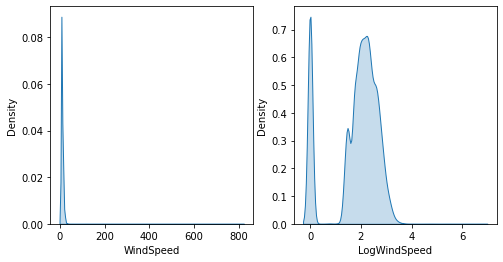

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(accidents.WindSpeed, shade=True, ax=axs[0])
sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1])

In [24]:
concrete = pd.read_csv('./concrete.csv')

In [27]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]
accidents["RoadwayFeatures"] = accidents[roadway_features].sum(axis=1)

In [29]:
accidents[roadway_features + ["RoadwayFeatures"]].tail()

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
99995,False,False,False,False,False,False,False,False,False,False,False,False,0
99996,False,False,False,False,False,False,False,False,False,False,False,False,0
99997,False,False,False,False,False,False,False,False,False,False,False,False,0
99998,False,False,False,False,False,False,False,False,False,False,False,True,1
99999,False,False,False,False,False,False,False,False,False,False,False,False,0


In [32]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water","Superplasticizer", "CoarseAggregate", "FineAggregate"]

concrete['Components'] = concrete[components].ge(0).sum(axis=1)

In [33]:
concrete[components + ['Components'] ].head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5


In [38]:
customers = pd.read_csv('./customer.csv',index_col=0,parse_dates=True)

In [39]:
customers.head()

,Customer,State,CustomerLifetimeValue,Response,Coverage,Education,EffectiveToDate,EmploymentStatus,Gender,Income,...,MonthsSincePolicyInception,NumberofOpenComplaints,NumberofPolicies,PolicyType,Policy,RenewOfferType,SalesChannel,ClaimAmount,VehicleClass,VehicleSize
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [42]:
list(customers.columns)

['Customer',
 'State',
 'CustomerLifetimeValue',
 'Response',
 'Coverage',
 'Education',
 'EffectiveToDate',
 'EmploymentStatus',
 'Gender',
 'Income',
 'LocationCode',
 'MaritalStatus',
 'MonthlyPremiumAuto',
 'MonthsSinceLastClaim',
 'MonthsSincePolicyInception',
 'NumberofOpenComplaints',
 'NumberofPolicies',
 'PolicyType',
 'Policy',
 'RenewOfferType',
 'SalesChannel',
 'ClaimAmount',
 'VehicleClass',
 'VehicleSize']

In [43]:
customers['Policy'].head()

0    Corporate L3
1     Personal L3
2     Personal L3
3    Corporate L2
4     Personal L1
Name: Policy, dtype: object

In [45]:
customers[['Type','Level']] = customers['Policy'].str.split(' ',expand=True)

In [46]:
customers[['Type','Level','Policy']].head()

,Type,Level,Policy
0,Corporate,L3,Corporate L3
1,Personal,L3,Personal L3
2,Personal,L3,Personal L3
3,Corporate,L2,Corporate L2
4,Personal,L1,Personal L1


In [60]:
customers[['month','day','year']] = customers['EffectiveToDate'].str.split('/',expand=True)
customers.year = '20'+customers.year

In [62]:
customers[['EffectiveToDate','day','month','year']].tail()

,EffectiveToDate,day,month,year
9129,2/10/11,10,2,2011
9130,2/12/11,12,2,2011
9131,2/6/11,6,2,2011
9132,2/3/11,3,2,2011
9133,2/14/11,14,2,2011


In [69]:
customers['AverageIncome'] = customers.groupby('State')['Income'].transform('mean')

In [72]:
customers[['Income','State','AverageIncome']].head()

,Income,State,AverageIncome
0,56274,Washington,38122.733083
1,0,Arizona,37405.402231
2,48767,Nevada,38369.605442
3,0,California,37558.946667
4,43836,Washington,38122.733083


In [74]:
customers['StateFreq'] = customers.groupby('State')['State'].transform('count')/customers.State.count()

In [75]:
customers[['State','StateFreq']].head()

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366


In [78]:
df_train = customers.sample(frac=0.5)
df_valid = customers.drop(df_train.index)

In [79]:
df_train['AverageClaim'] = df_train.groupby('Coverage')['ClaimAmount'].transform('mean')

In [81]:
df_valid.shape

(4567, 31)

In [82]:
df_valid = df_valid.merge(df_train[['AverageClaim','Coverage']].drop_duplicates(),on='Coverage',how='left')

In [83]:
df_valid[['AverageClaim','Coverage']].head()

,AverageClaim,Coverage
0,377.758670,Basic
1,667.846408,Premium
2,377.758670,Basic
3,377.758670,Basic
4,377.758670,Basic


In [84]:
hosing = pd.read_csv('./housing.csv')

In [86]:
X = hosing.loc[:,["MedInc", "Latitude", "Longitude"]]

In [87]:
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [90]:
from sklearn.cluster import KMeans

In [94]:
k_means = KMeans(n_clusters=6)
X["Cluster"] = k_means.fit_predict(X)

In [96]:
X['Cluster'].tail()

20635    3
20636    3
20637    3
20638    3
20639    3
Name: Cluster, dtype: int32

In [97]:
X['Cluster'].dtype

dtype('int32')

In [98]:
X['Cluster'] = X['Cluster'].astype('category')

In [100]:
X['Cluster'].dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5], ordered=False)

<Figure size 1080x720 with 0 Axes>

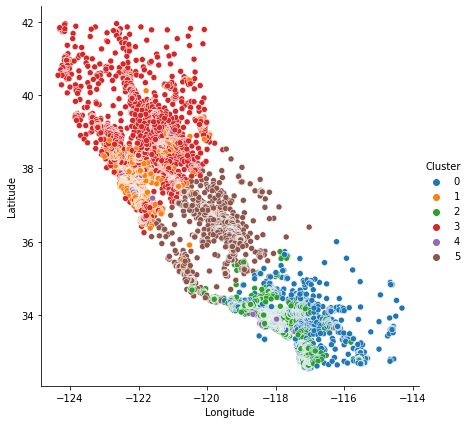

In [104]:
plt.figure(figsize=(15,10))
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=X, height=6,
)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

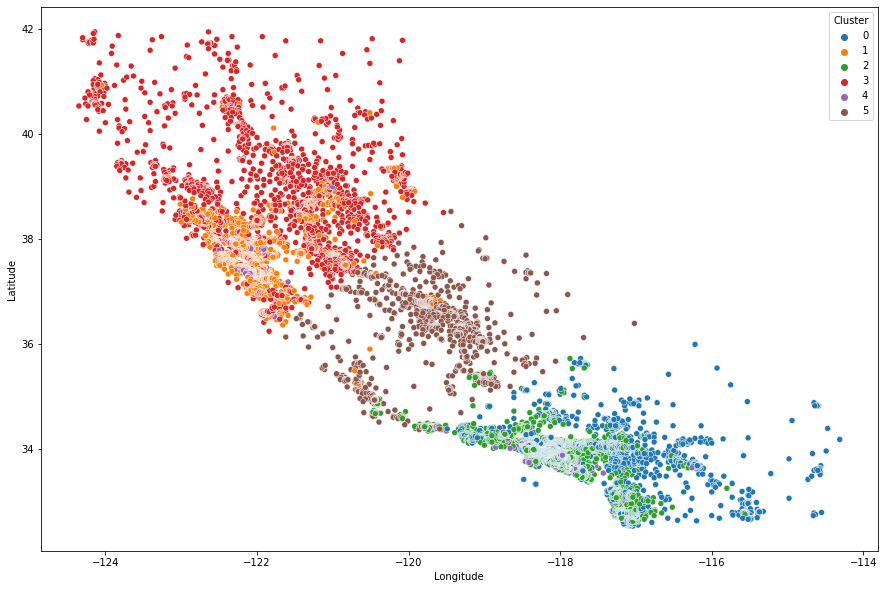

In [106]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Longitude", y="Latitude", hue="Cluster", data=X)

In [107]:
X["MedHouseVal"] = hosing["MedHouseVal"]

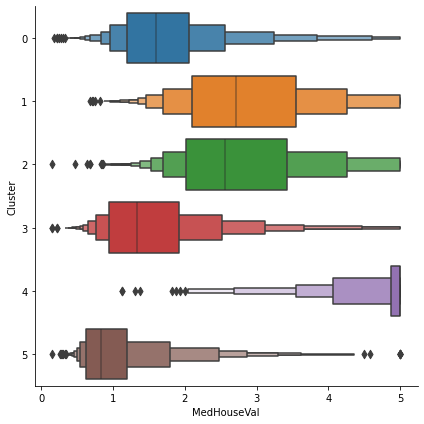

In [109]:
sns.catplot(x="MedHouseVal",y='Cluster',data=X,kind='boxen',height=6)

## Feature Engineering with PCA:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [35]:
def plot_variance(pca,width=8,dpi=100):
    fig,axs = plt.subplots(1,2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0))
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0))
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

In [3]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [4]:
df = pd.read_csv('./autos.csv')

In [15]:
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]
X = df.copy()
y = X.pop('price')
X = X[features]


In [17]:
X.head()

,highway_mpg,engine_size,horsepower,curb_weight
0,27,130,111,2548
1,27,130,111,2548
2,26,152,154,2823
3,30,109,102,2337
4,22,136,115,2824


In [18]:
X_scaled = (X - X.mean(axis=0))/X.std(axis=0)

In [22]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [26]:
component_names = [f'PC_{i+1}' for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca,columns=component_names)


In [27]:
X_pca.head()

,PC_1,PC_2,PC_3,PC_4
0,0.382486,-0.400222,0.124122,0.169539
1,0.382486,-0.400222,0.124122,0.169539
2,1.550890,-0.107175,0.598361,-0.256081
3,-0.408859,-0.425947,0.243335,0.013920
4,1.132749,-0.814565,-0.202885,0.224138


In [30]:
lodings = pd.DataFrame(pca.components_,columns=component_names,index=X.columns)

In [31]:
lodings

,PC_1,PC_2,PC_3,PC_4
highway_mpg,-0.492347,0.503859,0.500448,0.503262
engine_size,0.770892,0.626709,0.013788,0.113008
horsepower,0.070142,0.019960,0.731093,-0.678369
curb_weight,-0.397996,0.594107,-0.463534,-0.523232


array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

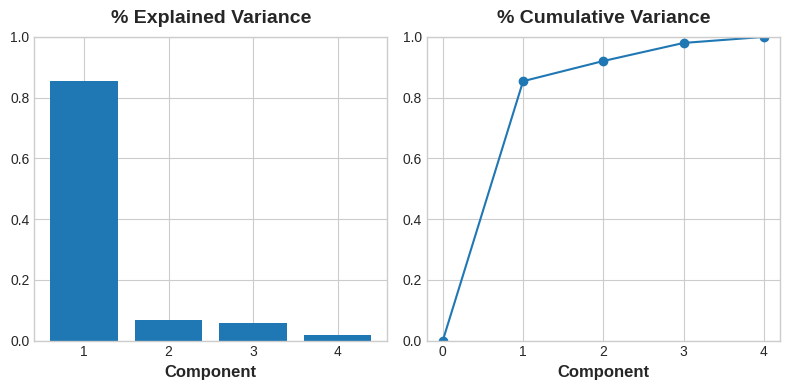

In [36]:
plot_variance(pca)

In [37]:
make_mi_scores(X_pca,y,False)

PC_1    1.014874
PC_2    0.380131
PC_3    0.307124
PC_4    0.204361
Name: MI Scores, dtype: float64

## Target Encoding:

In [17]:
autos = pd.read_csv('./autos.csv')

In [18]:
autos['make_encoded'] = autos.groupby('make')['price'].transform('mean')

In [19]:
autos[["make", "price", "make_encoded"]].head()

,make,price,make_encoded
0,alfa-romero,13495,15498.333333
1,alfa-romero,16500,15498.333333
2,alfa-romero,16500,15498.333333
3,audi,13950,17859.166667
4,audi,17450,17859.166667


In [22]:
autos.groupby('make')['price'].agg('mean')

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7790.125000
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda             9852.000000
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64

##### exemple of target encoding

In [5]:
movies = pd.read_csv('./movielens1m.csv')

In [6]:
movies.shape

(1000209, 28)

In [7]:
len(movies['Zipcode'].unique())

3439

In [8]:
X = movies.copy()
y = X.pop('Rating')

X_encode = X.sample(frac=0.25)
y_encode = y[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]

In [9]:
from category_encoders import MEstimateEncoder

In [10]:
encoder = MEstimateEncoder(cols=['Zipcode'],m=5)

In [11]:
encoder.fit(X_encode,y_encode)

MEstimateEncoder(cols=['Zipcode'], m=5)

In [12]:
X_train = encoder.transform(X_pretrain)

In [13]:
X_train.head()

,Movie ID,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Thriller,Unknown,War,Western,(no genres listed),User ID,Age,Gender,Occupation,Zipcode
0,b'3107',1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'130',35,1,18,3.789655
1,b'2114',0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,b'3829',25,0,0,2.901839
3,b'1389',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'2896',18,1,14,3.438447
4,b'3635',1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,b'5264',18,1,17,3.861088
6,b'2289',0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,b'5294',25,1,1,3.632223


/home/rachid/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


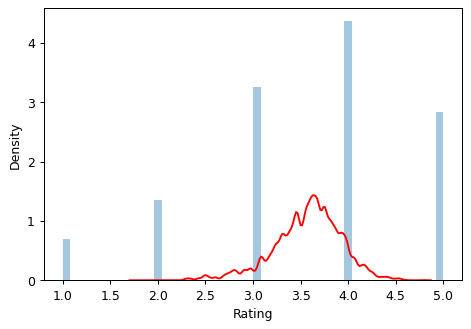

In [14]:
plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.Zipcode, color='r', ax=ax)